In [8]:
import pickle
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [9]:
import tensorflow as tf

In [10]:
tf.__version__

'2.7.0'

In [11]:
tf.test.is_gpu_available ()

True

In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [76]:
FilterList = glob.glob("F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million/*")

In [77]:
FilterList

['F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_11699',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_12034',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_12253',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_14620',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_15540',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_15705',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_15744',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_15745',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_15770',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_scratch/let20002/GDB_1million\\ML_results_GDB13_15775',
 'F:/BackUp_Storrs_HPC_Scratch/let20002_

In [99]:
DF_all_GDB = pd.DataFrame()

for file in FilterList:

        DF1 = pickle.load(open(file,"rb"))
        
        DF_all_GDB = DF_all_GDB.append(DF1.sample(frac=0.0008, random_state=1), ignore_index=True)


In [128]:
DF_GDB_10000 = DF_all_GDB.sample(frac=0.01, random_state=1)

In [130]:
lengh = [len(smi) for smi in DF_GDB_10000['Smiles']]

C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

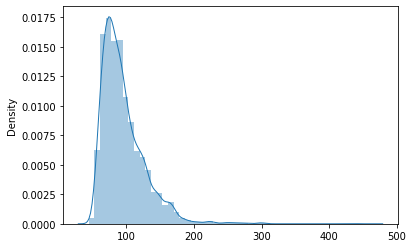

In [132]:
sns.distplot(lengh, hist = True, kde = True,
                 kde_kws = {'linewidth': 1})

In [127]:
np.savetxt(r'DF_GDB_1million.smi', DF_all_GDB.sample(frac=0.01, random_state=1)[['Smiles']].values, fmt='%s')

In [121]:
DF_all_GDB[['Smiles']].to_csv('DF_GDB_1million.csv',index=False)

In [146]:
DF_GDB_1million = pd.read_csv('DF_GDB_1million.csv')

In [101]:
with open("DF_GDB_1million.pkl", "wb") as f:
    pickle.dump(DF_all_GDB, f)

In [155]:
DF_GDB_1million = pickle.load(open("DF_GDB_1million.pkl","rb"))

In [156]:
DF_GDB_1million

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles
0,2.623047,2.916016,2.578125,2.089844,3.099609,2.345703,1.009766,1.079102,2.402344,0.115479,229.75000,426.500,359.50000,0.143677,820,5849616,*C1C2C=CCC(C)NC2CC1N1C(=O)C2CCC(C(C)(C=C)[Si](...
1,2.195312,2.511719,1.942383,1.320312,2.572266,1.665039,1.251953,1.088867,2.531250,0.106689,207.62500,374.500,265.25000,0.098022,6285,5849768,*N1C(=O)CC(CC(=CC2CC2(C)CC2CC2(C)C)CC2CC(=O)N(...
2,0.782227,0.852539,-0.147461,-0.708984,0.593750,-0.694336,1.302734,1.123047,1.645508,0.075562,38.68750,163.500,45.34375,0.092346,8297,5849867,*N(C(=O)CCCCC(=O)N(C(=O)CC(C)(CC)CC(=O)O)C1CC2...
3,-0.224731,-0.213135,-1.569336,-2.162109,-0.959473,-2.250000,1.204102,1.250000,1.584961,0.059845,52.78125,165.250,51.78125,0.071228,722,5849538,*N(C(=O)CCC(=O)N(C(=O)COCCOCCN1C(=O)C=CC1=O)C1...
4,1.212891,1.375977,0.402100,-0.169067,1.176758,-0.128784,1.345703,1.179688,1.815430,0.090820,242.12500,362.000,235.50000,0.110962,4971,5849819,*N1C(=O)c2ccc(Oc3c(C)cc(Cc4cc(C)c(Oc5ccc6c(c5)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110916,1.271484,1.377930,0.503906,-0.144531,1.178711,-0.061615,1.323242,1.212891,2.091797,0.094360,201.75000,265.000,309.00000,0.085327,7425,4457578,*C=NC(C)C(CC(C(=O)O)C(C)OCC)N1C(=O)C2CC(C3CC(=...
1110917,0.787109,0.929199,-0.152954,-0.701660,0.550781,-0.730469,1.251953,1.335938,1.916992,0.088318,133.00000,212.750,193.12500,0.105530,5703,4457741,*CC(C)(C(C)C(OCC)c1coc(=O)o1)N1C(=O)c2ccc(Oc3c...
1110918,1.783203,2.054688,1.159180,0.760254,1.895508,0.652832,1.134766,1.148438,2.330078,0.065796,155.62500,326.250,209.50000,0.087097,2531,4457756,*N1C(=O)c2ccc3c4c(C=CCCCC)cc5c6c(ccc(c7c(C=CCC...
1110919,0.879883,1.014648,-0.064148,-0.645508,0.585938,-0.677734,1.231445,1.224609,2.396484,0.077393,159.25000,306.750,277.00000,0.080139,4609,4457565,*C(CC#C)C(CC#N)(CN1C(=O)OC2CC(C3CC(=O)N(*)C3=O...


C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

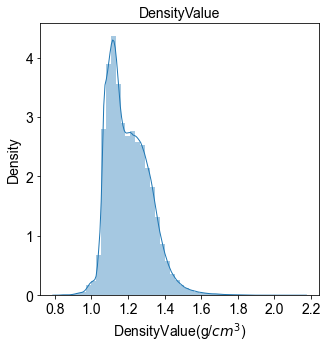

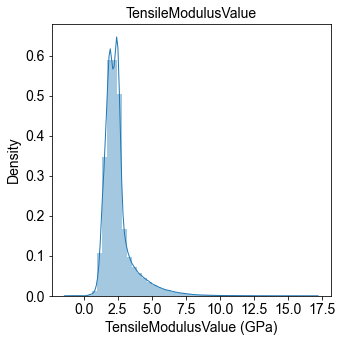

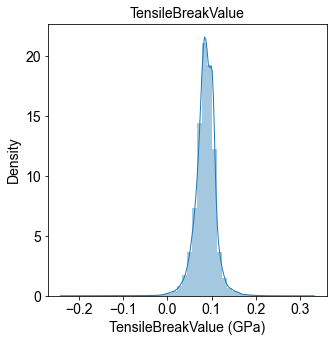

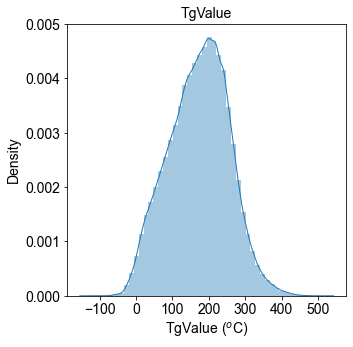

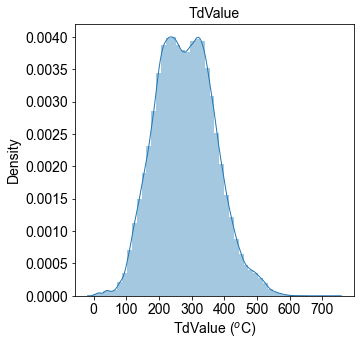

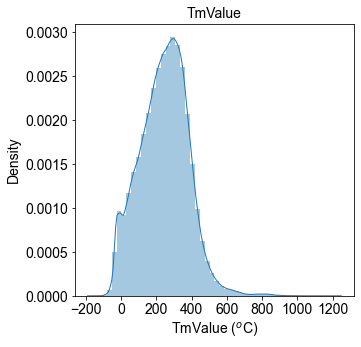

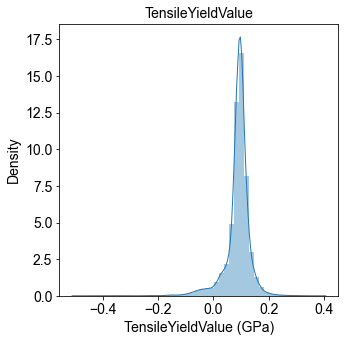

In [110]:
for col in ['DensityValue',
       'TensileModulusValue', 'TensileBreakValue', 'TgValue', 'TdValue',
       'TmValue', 'TensileYieldValue']:
    
    if col == 'DensityValue':
        xlable = col + '(g/$cm^3$)'
    if col in ['TgValue', 'TdValue','TmValue']:
        xlable = col + ' ($^o$C)'
    if col in ['TensileModulusValue', 'TensileBreakValue', 'TensileYieldValue']:
        xlable = col + ' (GPa)'
        
    plt.figure(figsize=(5,5))
    
    sns.distplot(DF_GDB_1million[col], hist = True, kde = True,
                 kde_kws = {'linewidth': 1})

    plt.title(col,fontname="Arial", fontsize=14)
    plt.xticks(fontname="Arial", fontsize=14, fontweight='normal')
    plt.yticks(fontname="Arial", fontsize=14, fontweight='normal')

    plt.xlabel(xlable,fontname="Arial", fontsize=14)
    plt.ylabel("Density",fontname="Arial", fontsize=14)

    plt.savefig("DF_GDB_1million_{}_His.png".format(col), dpi=1200, bbox_inches='tight') 

C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

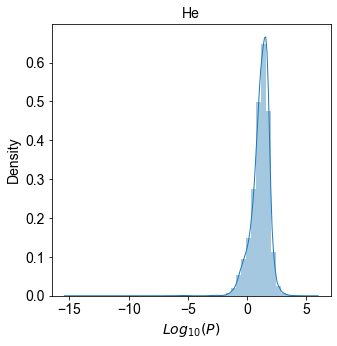

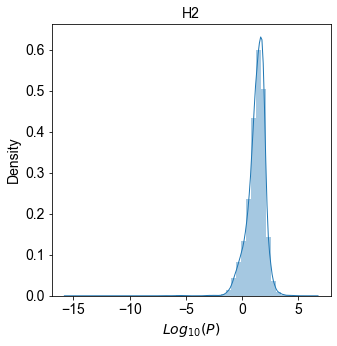

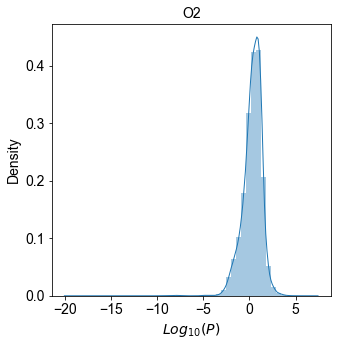

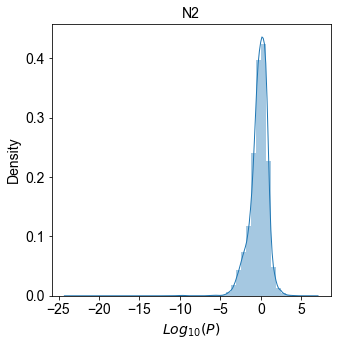

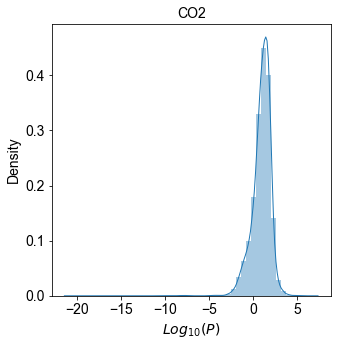

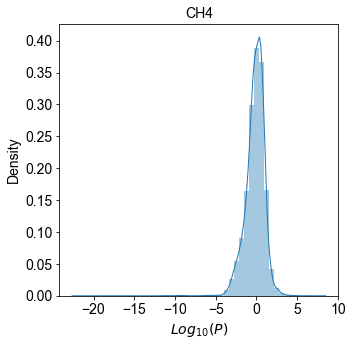

In [111]:
for col in ['He', 'H2', 'O2', 'N2', 'CO2', 'CH4']:
    plt.figure(figsize=(5,5))
    
    sns.distplot(DF_GDB_1million[col], hist = True, kde = True,
                 kde_kws = {'linewidth': 1})

    plt.title(col,fontname="Arial", fontsize=14)
    plt.xticks(fontname="Arial", fontsize=14, fontweight='normal')
    plt.yticks(fontname="Arial", fontsize=14, fontweight='normal')

    plt.xlabel("$Log_{10}(P)$",fontname="Arial", fontsize=14)
    plt.ylabel("Density",fontname="Arial", fontsize=14)

    plt.savefig("DF_GDB_1million_{}_His.png".format(col), dpi=1200, bbox_inches='tight') 

In [38]:
DF_all = pd.DataFrame()

for N in range(324):

    if os.path.isfile("ML_filtered_{}".format(N)):
        DF2 = pickle.load(open("ML_filtered_{}".format(N),"rb"))
        
        DF_all = DF_all.append(DF2, ignore_index=True)


In [39]:
DF_all

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles
0,3.568359,3.931641,4.027344,3.296875,4.414062,4.191406,1.115234,1.221680,2.388672,0.150513,240.6250,277.000,136.62500,0.112244,2020,404,*N(/C=C(/C#N)N(C(=O)C(=O)N(*)C(=O)N1CC2(CCCNC2...
1,3.123047,3.400391,3.376953,2.644531,3.914062,3.378906,1.268555,1.106445,2.232422,0.121521,124.5625,227.000,183.00000,0.099365,2734,404,*N(/C=C(/C#N)N(C(=O)CCC(=O)N(*)C(=O)N1CCN(C)C[...
2,3.240234,3.712891,3.621094,2.826172,4.027344,3.669922,1.202148,1.173828,3.285156,0.135254,206.7500,273.000,46.90625,0.124451,675,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)C(=O)N(*)C(=O)...
3,2.925781,3.308594,3.164062,2.318359,3.652344,3.136719,1.333984,1.219727,3.466797,0.151978,208.1250,285.000,49.65625,0.101929,1214,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)CC(=O)N(*)C(=O...
4,2.753906,3.208984,2.953125,2.082031,3.474609,2.910156,1.391602,1.255859,4.113281,0.147827,191.0000,270.750,11.96875,0.114624,1467,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)CCC(=O)N(*)C(=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2.732422,3.152344,2.867188,2.039062,3.455078,2.919922,1.416016,1.258789,3.554688,0.142334,167.2500,222.000,41.09375,0.101196,1467,160909,*N(C(=O)CCC(=O)N(/N=C(/C1CCN(C2CC3(CCN(C(=O)OC...
156,3.195312,3.546875,3.476562,2.767578,4.011719,3.533203,1.242188,1.179688,2.460938,0.129639,205.0000,252.125,85.37500,0.120300,1759,160909,*N(C(C)=O)C(=O)C1CCC2(CC1)CCC(C(=O)N(/N=C(/C1C...
157,3.183594,3.544922,3.466797,2.736328,3.994141,3.525391,1.259766,1.179688,2.460938,0.129639,205.0000,252.125,85.37500,0.120300,1808,160909,*N(C(C)=O)C(=O)C1CCCCCC(C(=O)N(/N=C(/C2CCN(C3C...
158,3.212891,3.669922,3.623047,2.859375,4.066406,3.748047,1.204102,1.286133,3.882812,0.153687,211.5000,240.375,40.90625,0.099976,2020,160909,*N(C(=O)C(=O)N(/N=C(/C1CCN(C2CC3(CCN(C(=O)OCC)...


In [17]:
List_dianhydride = pickle.load(open("F:/let20002/Documents/Billion_Polyimides/PolyInfo_PubChem_smi_dianhydride.pkl","rb"))
List_diamine = pickle.load(open("F:/let20002/Documents/Billion_Polyimides/PolyInfo_PubChem_smi_diamine.pkl","rb"))
List_diisocyanate = pickle.load(open("F:/let20002/Documents/Billion_Polyimides/PolyInfo_PubChem_smi_diisocyanate.pkl","rb"))

In [20]:
print(len(List_dianhydride))
print(len(List_diamine))
print(len(List_diisocyanate))

3468
161530
7529


In [65]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
import sascorer

In [66]:
DF_all['Smi_A'] = np.nan
DF_all['Smi_B'] = np.nan

for i in range(len(DF_all)):
    DF_all.loc[i, ['Smi_A']] = List_dianhydride[int(DF_all.iloc[i]['Comp_A'])]
    DF_all.loc[i, ['Smi_B']] = List_diamine[int(DF_all.iloc[i]['Comp_B'])]

In [67]:
mols = np.array([Chem.MolFromSmiles(smi) for smi in DF_all['Smi_A']])

In [69]:
DF_all['SA_A'] = [sascorer.calculateScore(mol) for mol in mols]

In [70]:
mols = np.array([Chem.MolFromSmiles(smi) for smi in DF_all['Smi_B']])

In [71]:
DF_all['SA_B'] = [sascorer.calculateScore(mol) for mol in mols]

In [72]:
DF_all

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,...,TdValue,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles,Smi_A,Smi_B,SA_A,SA_B
0,3.568359,3.931641,4.027344,3.296875,4.414062,4.191406,1.115234,1.221680,2.388672,0.150513,...,277.000,136.62500,0.112244,2020,404,*N(/C=C(/C#N)N(C(=O)C(=O)N(*)C(=O)N1CC2(CCCNC2...,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CC1CCC2C(C1)CCC3C2CCC4(C3CCC4C(=O)CN(/C=C(/C#N...,4.233980,4.932719
1,3.123047,3.400391,3.376953,2.644531,3.914062,3.378906,1.268555,1.106445,2.232422,0.121521,...,227.000,183.00000,0.099365,2734,404,*N(/C=C(/C#N)N(C(=O)CCC(=O)N(*)C(=O)N1CCN(C)C[...,C[C@@H]1CN(CCN1C(=O)OC(=O)CCC(=O)OC(=O)N2CCN(C...,CC1CCC2C(C1)CCC3C2CCC4(C3CCC4C(=O)CN(/C=C(/C#N...,3.678680,4.932719
2,3.240234,3.712891,3.621094,2.826172,4.027344,3.669922,1.202148,1.173828,3.285156,0.135254,...,273.000,46.90625,0.124451,675,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)C(=O)N(*)C(=O)...,C[C@H]1CN([C@]12CCNC2)C(=O)OC(=O)C(=O)OC(=O)N3...,CC(N)N1CCCN2CCN(CCCN(CC2)C(C)N)CC1,5.719116,4.952540
3,2.925781,3.308594,3.164062,2.318359,3.652344,3.136719,1.333984,1.219727,3.466797,0.151978,...,285.000,49.65625,0.101929,1214,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)CC(=O)N(*)C(=O...,C1CCC(C1)C(=O)OC(=O)CC(=O)OC(=O)C2CCCC2,CC(N)N1CCCN2CCN(CCCN(CC2)C(C)N)CC1,2.603643,4.952540
4,2.753906,3.208984,2.953125,2.082031,3.474609,2.910156,1.391602,1.255859,4.113281,0.147827,...,270.750,11.96875,0.114624,1467,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)CCC(=O)N(*)C(=...,C1CCN(CC1)C(=O)OC(=O)CCC(=O)OC(=O)N2CCCCC2,CC(N)N1CCCN2CCN(CCCN(CC2)C(C)N)CC1,2.425376,4.952540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2.732422,3.152344,2.867188,2.039062,3.455078,2.919922,1.416016,1.258789,3.554688,0.142334,...,222.000,41.09375,0.101196,1467,160909,*N(C(=O)CCC(=O)N(/N=C(/C1CCN(C2CC3(CCN(C(=O)OC...,C1CCN(CC1)C(=O)OC(=O)CCC(=O)OC(=O)N2CCCCC2,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,2.425376,3.779389
156,3.195312,3.546875,3.476562,2.767578,4.011719,3.533203,1.242188,1.179688,2.460938,0.129639,...,252.125,85.37500,0.120300,1759,160909,*N(C(C)=O)C(=O)C1CCC2(CC1)CCC(C(=O)N(/N=C(/C1C...,CC(=O)OC(=O)C1CCC2(CC1)CCC(CC2)C(=O)OC(=O)C,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,3.512951,3.779389
157,3.183594,3.544922,3.466797,2.736328,3.994141,3.525391,1.259766,1.179688,2.460938,0.129639,...,252.125,85.37500,0.120300,1808,160909,*N(C(C)=O)C(=O)C1CCCCCC(C(=O)N(/N=C(/C2CCN(C3C...,CC(=O)OC(=O)C1CCCCCC(CCC1)C(=O)OC(=O)C,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,3.623898,3.779389
158,3.212891,3.669922,3.623047,2.859375,4.066406,3.748047,1.204102,1.286133,3.882812,0.153687,...,240.375,40.90625,0.099976,2020,160909,*N(C(=O)C(=O)N(/N=C(/C1CCN(C2CC3(CCN(C(=O)OCC)...,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,4.233980,3.779389


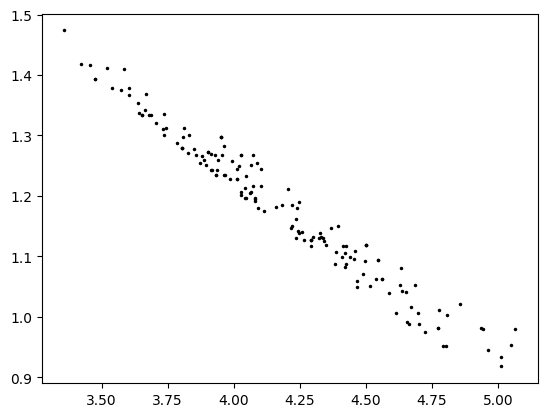

In [74]:
DF_all['permeability'] = DF_all['CO2']
DF_all['selectivity'] = DF_all['CO2'] - DF_all['N2']
plt.plot(permeability, selectivity, '.', markersize=3, color='k')

In [124]:
DF_all

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,...,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles,Smi_A,Smi_B,SA_A,SA_B,permeability
0,3.568359,3.931641,4.027344,3.296875,4.414062,4.191406,1.117188,1.221680,2.388672,0.150513,...,136.62500,0.112244,2020,404,*N(/C=C(/C#N)N(C(=O)C(=O)N(*)C(=O)N1CC2(CCCNC2...,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CC1CCC2C(C1)CCC3C2CCC4(C3CCC4C(=O)CN(/C=C(/C#N...,4.233980,4.932719,4.414062
1,3.123047,3.400391,3.376953,2.644531,3.914062,3.378906,1.269531,1.106445,2.232422,0.121521,...,183.00000,0.099365,2734,404,*N(/C=C(/C#N)N(C(=O)CCC(=O)N(*)C(=O)N1CCN(C)C[...,C[C@@H]1CN(CCN1C(=O)OC(=O)CCC(=O)OC(=O)N2CCN(C...,CC1CCC2C(C1)CCC3C2CCC4(C3CCC4C(=O)CN(/C=C(/C#N...,3.678680,4.932719,3.914062
2,3.240234,3.712891,3.621094,2.826172,4.027344,3.669922,1.201172,1.173828,3.285156,0.135254,...,46.90625,0.124451,675,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)C(=O)N(*)C(=O)...,C[C@H]1CN([C@]12CCNC2)C(=O)OC(=O)C(=O)OC(=O)N3...,CC(N)N1CCCN2CCN(CCCN(CC2)C(C)N)CC1,5.719116,4.952540,4.027344
3,2.925781,3.308594,3.164062,2.318359,3.652344,3.136719,1.333984,1.219727,3.466797,0.151978,...,49.65625,0.101929,1214,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)CC(=O)N(*)C(=O...,C1CCC(C1)C(=O)OC(=O)CC(=O)OC(=O)C2CCCC2,CC(N)N1CCCN2CCN(CCCN(CC2)C(C)N)CC1,2.603643,4.952540,3.652344
4,2.753906,3.208984,2.953125,2.082031,3.474609,2.910156,1.392578,1.255859,4.113281,0.147827,...,11.96875,0.114624,1467,1750,*C(C)N1CCCN2CCN(CCCN(C(C)N(C(=O)CCC(=O)N(*)C(=...,C1CCN(CC1)C(=O)OC(=O)CCC(=O)OC(=O)N2CCCCC2,CC(N)N1CCCN2CCN(CCCN(CC2)C(C)N)CC1,2.425376,4.952540,3.474609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2.732422,3.152344,2.867188,2.039062,3.455078,2.919922,1.416016,1.258789,3.554688,0.142334,...,41.09375,0.101196,1467,160909,*N(C(=O)CCC(=O)N(/N=C(/C1CCN(C2CC3(CCN(C(=O)OC...,C1CCN(CC1)C(=O)OC(=O)CCC(=O)OC(=O)N2CCCCC2,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,2.425376,3.779389,3.455078
156,3.195312,3.546875,3.476562,2.767578,4.011719,3.533203,1.244141,1.179688,2.460938,0.129639,...,85.37500,0.120300,1759,160909,*N(C(C)=O)C(=O)C1CCC2(CC1)CCC(C(=O)N(/N=C(/C1C...,CC(=O)OC(=O)C1CCC2(CC1)CCC(CC2)C(=O)OC(=O)C,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,3.512951,3.779389,4.011719
157,3.183594,3.544922,3.466797,2.736328,3.994141,3.525391,1.257812,1.179688,2.460938,0.129639,...,85.37500,0.120300,1808,160909,*N(C(C)=O)C(=O)C1CCCCCC(C(=O)N(/N=C(/C2CCN(C3C...,CC(=O)OC(=O)C1CCCCCC(CCC1)C(=O)OC(=O)C,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,3.623898,3.779389,3.994141
158,3.212891,3.669922,3.623047,2.859375,4.066406,3.748047,1.207031,1.286133,3.882812,0.153687,...,40.90625,0.099976,2020,160909,*N(C(=O)C(=O)N(/N=C(/C1CCN(C2CC3(CCN(C(=O)OCC)...,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,4.233980,3.779389,4.066406


In [94]:
for i in range(160):
    print(i, DF_all[['permeability', 'selectivity', 'SA_A','SA_B','Comp_A','Comp_B']].iloc[i])

0 permeability       4.414062
selectivity        1.117188
SA_A               4.233980
SA_B               4.932719
Comp_A          2020.000000
Comp_B           404.000000
Name: 0, dtype: float64
1 permeability       3.914062
selectivity        1.269531
SA_A               3.678680
SA_B               4.932719
Comp_A          2734.000000
Comp_B           404.000000
Name: 1, dtype: float64
2 permeability       4.027344
selectivity        1.201172
SA_A               5.719116
SA_B               4.952540
Comp_A           675.000000
Comp_B          1750.000000
Name: 2, dtype: float64
3 permeability       3.652344
selectivity        1.333984
SA_A               2.603643
SA_B               4.952540
Comp_A          1214.000000
Comp_B          1750.000000
Name: 3, dtype: float64
4 permeability       3.474609
selectivity        1.392578
SA_A               2.425376
SA_B               4.952540
Comp_A          1467.000000
Comp_B          1750.000000
Name: 4, dtype: float64
5 permeability       4.062500


In [128]:
pd. set_option('display.max_rows', 500)

In [ ]:
0,15,19,39,52,

In [163]:
D10 = DF_all[['permeability', 'selectivity', 'SA_A','SA_B','Comp_A','Comp_B','Smi_A','Smi_B','Smiles']].loc[[0,15,19,39,42,59,82,120,142,156]]

In [164]:
PandasTools.AddMoleculeColumnToFrame(frame=D10, smilesCol='Smi_A', molCol='Mol_A')
PandasTools.AddMoleculeColumnToFrame(frame=D10, smilesCol='Smi_B', molCol='Mol_B')
PandasTools.AddMoleculeColumnToFrame(frame=D10, smilesCol='Smiles')

In [168]:
D10.to_csv('10_select_CO2_N2.csv', index = True)

,permeability,selectivity,SA_A,SA_B,Comp_A,Comp_B,Smi_A,Smi_B,Smiles,Mol_A,Mol_B,ROMol
0,4.414062,1.117188,4.233980,4.932719,2020,404,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CC1CCC2C(C1)CCC3C2CCC4(C3CCC4C(=O)CN(/C=C(/C#N...,*N(/C=C(/C#N)N(C(=O)C(=O)N(*)C(=O)N1CC2(CCCNC2...,,,
15,5.011719,0.917969,5.719116,4.026598,675,17787,C[C@H]1CN([C@]12CCNC2)C(=O)OC(=O)C(=O)OC(=O)N3...,C1CCC(CC1)C(C2CCC(C2)C3CCC(C3)C(C4CCCC4)N)N,*C(C1CCCCC1)C1CCC(C2CCC(C(C3CCCC3)N(C(=O)C(=O)...,,,
19,4.394531,1.150391,4.233980,5.848384,2020,20461,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CC1(CC2CCCC(C2)C1)CC(CC3CCC4CC(CC3C4)CN)N,*C(CC1CCC2CC(CN(C(=O)C(=O)N(*)C(=O)N3CC4(CCCNC...,,,
39,4.257812,1.140625,4.233980,4.559657,2020,39093,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CC1[C@@H]2CC[C@H]3[C@@H]4CC[C@@H]([C@]4(CC[C@@...,*C(CN(C(=O)C(=O)N(*)C(=O)N1CC2(CCCNC2)C1)C(=O)...,,,
42,3.521484,1.412109,4.233980,4.004021,2020,40627,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CC(C)CN1CCC(CC1C2CN(CCC2CN)C(C)C)CN,*CC1CCN(CC(C)C)C(C2CN(C(C)C)CCC2CN(C(=O)C(=O)N...,,,
59,3.929688,1.267578,5.719116,3.289594,675,62452,C[C@H]1CN([C@]12CCNC2)C(=O)OC(=O)C(=O)OC(=O)N3...,C1CCC(CC1)C2CN(CCC2C3CCN(CC3)C(=O)N)C(=O)N,*C(=O)N1CCC(C2CCN(C(=O)N(C(=O)C(=O)N(*)C(=O)N3...,,,
82,4.773438,0.982422,4.233980,4.886609,2020,91101,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CC1CCC2C(C1)CCC3C2CCC4(C3CCC4[C@H](C)CN(/C=C\N...,*N(/C=C\N(C(=O)C(=O)N(*)C(=O)N1CC2(CCCNC2)C1)C...,,,
120,4.468750,1.058594,4.233980,5.805493,2020,131739,C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C...,CC1(C2CCC1(C(C2)C(CN)(C3CC4CCC3(C4(C)C)C)N)C)C,*N(C(=O)C(=O)N(CC(*)(C1CC2CCC1(C)C2(C)C)C1CC2C...,,,
142,4.066406,1.251953,5.719116,5.934214,675,151128,C[C@H]1CN([C@]12CCNC2)C(=O)OC(=O)C(=O)OC(=O)N3...,C1C2CC3(CC1CC(C2)(C3)C45CC6CC(C4)CC(C6)(C5)CN)CN,*CC12CC3CC(C1)CC(C14CC5CC(CC(CN(C(=O)C(=O)N(*)...,,,
156,4.011719,1.244141,3.512951,3.779389,1759,160909,CC(=O)OC(=O)C1CCC2(CC1)CCC(CC2)C(=O)OC(=O)C,CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C...,*N(C(C)=O)C(=O)C1CCC2(CC1)CCC(C(=O)N(/N=C(/C1C...,,,

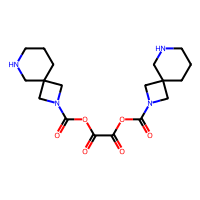
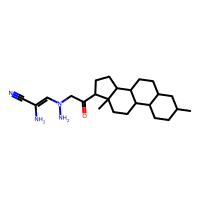
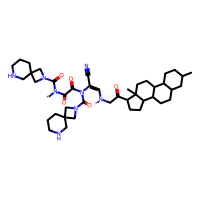
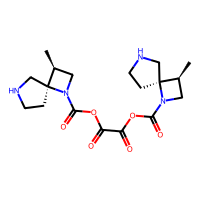
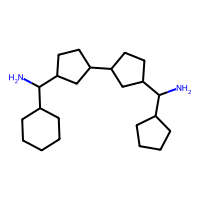
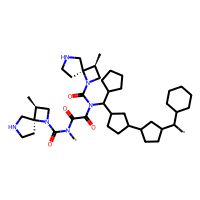
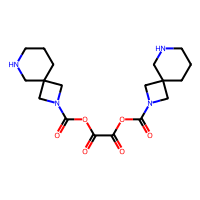
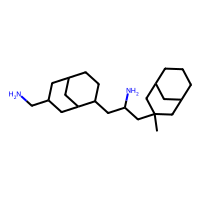
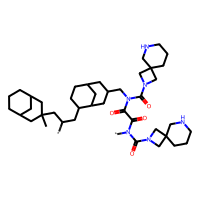
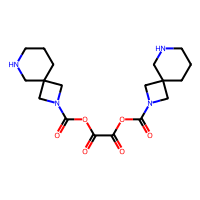
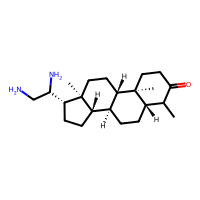
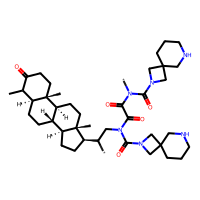
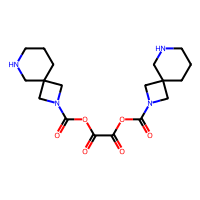
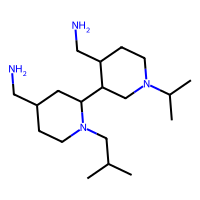
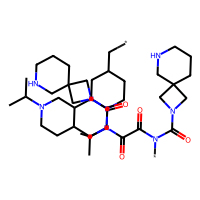
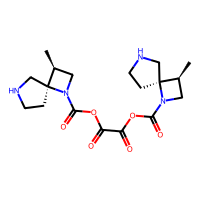
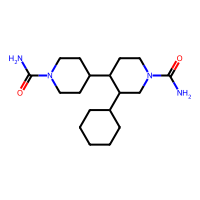
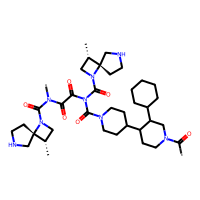
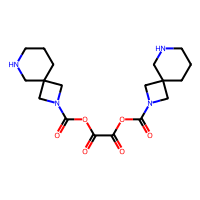
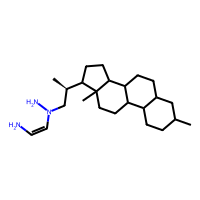
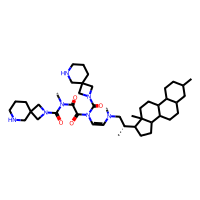
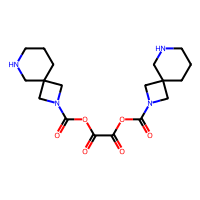
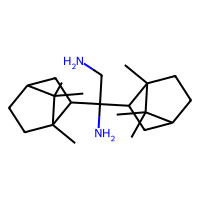
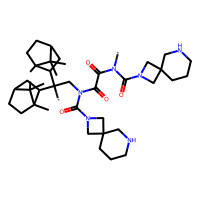
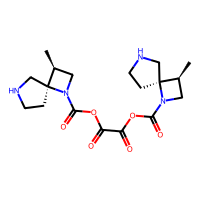
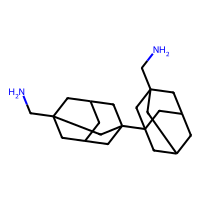
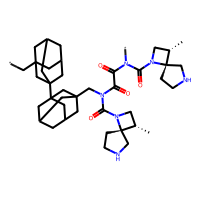
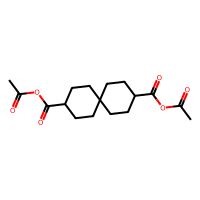
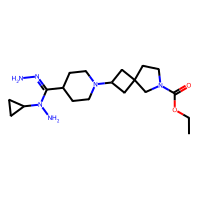
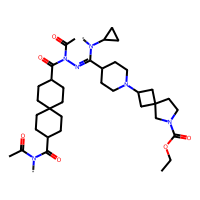

In [166]:
for smi in D10['Smi_B']:
    print(smi)

CC1CCC2C(C1)CCC3C2CCC4(C3CCC4C(=O)CN(/C=C(/C#N)\N)N)C
C1CCC(CC1)C(C2CCC(C2)C3CCC(C3)C(C4CCCC4)N)N
CC1(CC2CCCC(C2)C1)CC(CC3CCC4CC(CC3C4)CN)N
CC1[C@@H]2CC[C@H]3[C@@H]4CC[C@@H]([C@]4(CC[C@@H]3[C@]2(CCC1=O)C)C)C(CN)N
CC(C)CN1CCC(CC1C2CN(CCC2CN)C(C)C)CN
C1CCC(CC1)C2CN(CCC2C3CCN(CC3)C(=O)N)C(=O)N
CC1CCC2C(C1)CCC3C2CCC4(C3CCC4[C@H](C)CN(/C=C\N)N)C
CC1(C2CCC1(C(C2)C(CN)(C3CC4CCC3(C4(C)C)C)N)C)C
C1C2CC3(CC1CC(C2)(C3)C45CC6CC(C4)CC(C6)(C5)CN)CN
CCOC(=O)N1CCC2(C1)CC(C2)N3CCC(CC3)/C(=N/N)/N(C4CC4)N


In [167]:
for smi in D10['Smi_A']:
    print(smi)

C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C3)CCCNC4
C[C@H]1CN([C@]12CCNC2)C(=O)OC(=O)C(=O)OC(=O)N3C[C@@H]([C@@]34CCNC4)C
C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C3)CCCNC4
C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C3)CCCNC4
C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C3)CCCNC4
C[C@H]1CN([C@]12CCNC2)C(=O)OC(=O)C(=O)OC(=O)N3C[C@@H]([C@@]34CCNC4)C
C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C3)CCCNC4
C1CC2(CNC1)CN(C2)C(=O)OC(=O)C(=O)OC(=O)N3CC4(C3)CCCNC4
C[C@H]1CN([C@]12CCNC2)C(=O)OC(=O)C(=O)OC(=O)N3C[C@@H]([C@@]34CCNC4)C
CC(=O)OC(=O)C1CCC2(CC1)CCC(CC2)C(=O)OC(=O)C


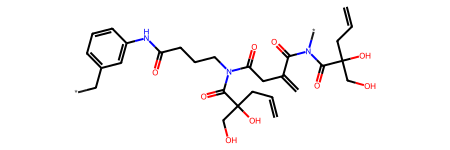

In [34]:
Chem.MolFromSmiles(DF_all.iloc[1040564]['Smiles'])

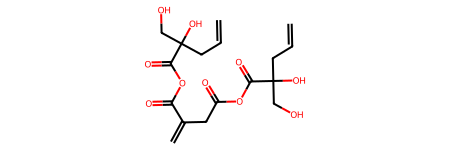

In [35]:
Chem.MolFromSmiles(List_dianhydride[1456])

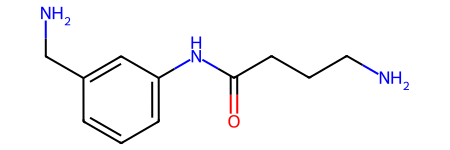

In [36]:
Chem.MolFromSmiles(List_diamine[161511])

In [23]:
DF_all = pd.DataFrame()

for N in range(324):

    if N != 75 and os.path.isfile("ML_results_{}".format(N)):
        DF2 = pickle.load(open("ML_results_{}".format(N),"rb"))
        
        DF_all = DF_all.append(DF2.sample(frac=0.002, random_state=1), ignore_index=True)


In [24]:
DF_all

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles
0,-0.152832,-0.118103,-1.449219,-2.017578,-0.792480,-2.197266,1.225586,1.104492,1.621094,0.061218,64.0000,168.25000,83.62500,0.030792,2179,135,*[C@H](CCCc1ccccc1)C(=O)N[C@@H](C)C(=O)CCc1ccc...
1,-0.635254,-0.577637,-2.042969,-2.951172,-1.592773,-2.769531,1.357422,1.283203,3.763672,0.105347,256.0000,144.50000,334.50000,0.087036,3271,320,*[C@@H](CCC(=O)O)C(=O)NCC[C@@H](C(=O)O)N(C(=O)...
2,1.934570,2.138672,1.411133,0.878418,2.105469,0.934570,1.226562,1.128906,2.166016,0.036011,97.3750,207.12500,146.25000,0.052307,2509,142,*[C@H](CCCN/C(=C/CC)N1C(=O)C2C3C(=O)N(*)C(=O)C...
3,-0.220459,-0.110168,-1.442383,-2.187500,-0.888184,-2.080078,1.299805,1.156250,1.980469,0.090027,79.6250,127.37500,153.12500,0.104187,2577,101,*CC#Cc1cc(CN2CCCC2C(=O)N(C(=O)CSCCC2NC(C(=O)N(...
4,1.654297,1.763672,1.090820,0.441650,1.684570,0.520996,1.243164,1.129883,2.484375,0.102356,188.3750,354.25000,255.50000,0.090515,827,434,*C(c1ccc(OCC)c(C)c1)C(C)N1C(=O)[C@H]2C[C@@H]([...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040560,-1.257812,-1.204102,-2.804688,-3.726562,-2.304688,-3.568359,1.422852,1.319336,6.507812,0.070496,102.4375,163.62500,136.00000,0.075195,295,161523,*CC(Cc1ccc(S(C)(=O)=O)cc1)CN(C(=O)CC(=C)C(=O)N...
1040561,-0.107849,0.001907,-1.265625,-2.128906,-0.783691,-1.939453,1.344727,1.237305,1.652344,0.088074,218.6250,55.96875,309.25000,0.070557,1316,161521,*C(CCCCN1C(=O)[C@H]2C3C=C(OC)C([C@@H]4C(=O)N(*...
1040562,-0.977539,-0.745117,-2.150391,-3.271484,-1.658203,-3.066406,1.613281,1.208008,4.914062,0.077637,203.1250,126.75000,60.59375,0.116760,2987,161521,*C(CCCCN(C(=O)CC(=C)C(=O)N(*)C(=O)/C(C)=C(/C)C...
1040563,0.280762,0.291748,-0.985840,-1.604492,-0.338867,-1.528320,1.265625,1.458984,5.519531,0.053894,105.8750,176.12500,332.25000,0.124817,91,161512,*CCN1CCN(CCNCCN2CCN(CCN3C(=O)C(O)C(=O)C(=O)N(*...


In [104]:
DF_all.columns

Index(['He', 'H2', 'O2', 'N2', 'CO2', 'CH4', 'selectivity', 'DensityValue',
       'TensileModulusValue', 'TensileBreakValue', 'TgValue', 'TdValue',
       'TmValue', 'TensileYieldValue', 'Comp_A', 'Comp_B', 'Smiles'],
      dtype='object')

In [105]:
with open("DF_pubchem_1million.pkl", "wb") as f:
    pickle.dump(DF_all, f)

In [153]:
DF_pubchem_1million = pickle.load(open("DF_pubchem_1million.pkl","rb"))

In [154]:
DF_pubchem_1million

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles
0,-0.152832,-0.118103,-1.449219,-2.017578,-0.792480,-2.197266,1.225586,1.104492,1.621094,0.061218,64.0000,168.25000,83.62500,0.030792,2179,135,*[C@H](CCCc1ccccc1)C(=O)N[C@@H](C)C(=O)CCc1ccc...
1,-0.635254,-0.577637,-2.042969,-2.951172,-1.592773,-2.769531,1.357422,1.283203,3.763672,0.105347,256.0000,144.50000,334.50000,0.087036,3271,320,*[C@@H](CCC(=O)O)C(=O)NCC[C@@H](C(=O)O)N(C(=O)...
2,1.934570,2.138672,1.411133,0.878418,2.105469,0.934570,1.226562,1.128906,2.166016,0.036011,97.3750,207.12500,146.25000,0.052307,2509,142,*[C@H](CCCN/C(=C/CC)N1C(=O)C2C3C(=O)N(*)C(=O)C...
3,-0.220459,-0.110168,-1.442383,-2.187500,-0.888184,-2.080078,1.299805,1.156250,1.980469,0.090027,79.6250,127.37500,153.12500,0.104187,2577,101,*CC#Cc1cc(CN2CCCC2C(=O)N(C(=O)CSCCC2NC(C(=O)N(...
4,1.654297,1.763672,1.090820,0.441650,1.684570,0.520996,1.243164,1.129883,2.484375,0.102356,188.3750,354.25000,255.50000,0.090515,827,434,*C(c1ccc(OCC)c(C)c1)C(C)N1C(=O)[C@H]2C[C@@H]([...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040560,-1.257812,-1.204102,-2.804688,-3.726562,-2.304688,-3.568359,1.422852,1.319336,6.507812,0.070496,102.4375,163.62500,136.00000,0.075195,295,161523,*CC(Cc1ccc(S(C)(=O)=O)cc1)CN(C(=O)CC(=C)C(=O)N...
1040561,-0.107849,0.001907,-1.265625,-2.128906,-0.783691,-1.939453,1.344727,1.237305,1.652344,0.088074,218.6250,55.96875,309.25000,0.070557,1316,161521,*C(CCCCN1C(=O)[C@H]2C3C=C(OC)C([C@@H]4C(=O)N(*...
1040562,-0.977539,-0.745117,-2.150391,-3.271484,-1.658203,-3.066406,1.613281,1.208008,4.914062,0.077637,203.1250,126.75000,60.59375,0.116760,2987,161521,*C(CCCCN(C(=O)CC(=C)C(=O)N(*)C(=O)/C(C)=C(/C)C...
1040563,0.280762,0.291748,-0.985840,-1.604492,-0.338867,-1.528320,1.265625,1.458984,5.519531,0.053894,105.8750,176.12500,332.25000,0.124817,91,161512,*CCN1CCN(CCNCCN2CCN(CCN3C(=O)C(O)C(=O)C(=O)N(*...


In [135]:
DF_pubchem_10000 = DF_pubchem_1million.sample(frac=0.01, random_state=1)

In [136]:
DF_pubchem_10000

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles
955617,0.225830,0.298584,-0.933105,-1.567383,-0.255859,-1.495117,1.311523,1.103516,1.194336,0.041077,115.6250,107.375,62.40625,0.065430,861,148126,*C(CC=C)C(=O)NCCc1ccc(S(=O)(=O)N(C(=O)c2cccc(C...
1012464,0.719727,0.766602,-0.226074,-0.799316,0.245850,-0.758789,1.044922,1.310547,2.943359,0.072388,210.1250,310.250,414.75000,0.055420,48,157182,*CCCc1nccnc1CCCN1C(=O)[C@H]2C3CC(C4C5CC(C6C(=O...
915584,1.171875,1.233398,0.398193,-0.230713,0.914551,-0.193970,1.145508,1.295898,2.332031,0.095398,190.1250,283.000,408.50000,0.069946,2544,142465,*C(=O)C1CCC(C)N(Cc2ccc(CN3C(=O)[C@H]4C5CC([C@H...
411305,0.131226,0.194336,-1.146484,-1.727539,-0.492676,-1.749023,1.235352,1.216797,1.862305,0.088989,115.1250,343.250,110.18750,0.041565,887,64162,*[C@@H](CN(C(=O)c1cccc(C(=O)N(*)C(=O)C(O)CO)c1...
825001,0.235352,0.316162,-0.950684,-1.610352,-0.373535,-1.591797,1.237305,1.252930,2.425781,0.084534,208.3750,181.750,263.50000,0.085388,22,128048,*N1C(=O)CC2(CC1=O)CC1CC(C2)C(=O)N(Cc2nc(CC(=O)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470593,0.811035,0.914551,-0.108948,-0.812500,0.469238,-0.773926,1.282227,1.381836,1.913086,0.135010,284.2500,230.000,423.00000,0.074158,2429,73493,*N1C(=O)C2C(C1=O)C1C=C(F)C2C2C3C(=O)N(C(C(=O)O...
163145,0.348877,0.460449,-0.759766,-1.324219,-0.082458,-1.375977,1.242188,1.338867,5.101562,0.115723,178.0000,262.250,295.00000,0.093872,707,25427,*C(CCC(=O)N1C(=O)c2ccc(C(=O)ONOC(=O)c3ccc4c(c3...
813796,0.997070,1.191406,0.132202,-0.457764,0.814453,-0.416016,1.272461,1.264648,3.048828,0.101196,130.7500,234.625,160.00000,0.091553,726,126094,*[C@H](CN1C(=O)CN(c2ccc(N3CC(=O)N(*)C(=O)C3)c(...
488918,0.182495,0.182251,-1.027344,-1.791016,-0.414551,-1.533203,1.376953,1.418945,5.292969,0.100159,172.8750,158.250,335.25000,0.132446,1270,76000,*C[C@@H]1CC[C@H](CC(=O)N2C(=O)CC3(CC(=O)N(*)C3...


In [137]:
np.savetxt(r'DF_pubchem_1million.smi', DF_pubchem_10000[['Smiles']].values, fmt='%s')

In [138]:
lengh = [len(smi) for smi in DF_pubchem_10000['Smiles']]

C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

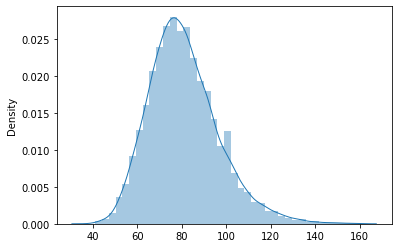

In [143]:
sns.distplot(lengh, hist = True, kde = True, bins=40,
                 kde_kws = {'linewidth': 1})

In [87]:
DF_pubchem_1million = pd.DataFrame()

In [88]:
DF_pubchem_1million['SMILES'] = DF_all['Smiles']

In [89]:
DF_pubchem_1million['SPLIT'] = 'test_scaffolds'

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
xtrain0, xtest = train_test_split(DF_pubchem_1million, test_size=0.20, random_state=200)

In [92]:
xtrain, xtest_scal = train_test_split(xtrain0, test_size=0.10, random_state=200)

In [93]:
xtrain

,SMILES,SPLIT
95616,*C(=O)c1ccc(-c2ccc(CN(C(=O)CCC(=O)N(*)C(=O)C(C...,test_scaffolds
731675,*[C@@H](CN(C(=O)CCCCC(=O)N(*)C(=O)CNCCCC)C(=O)...,test_scaffolds
460199,*C(c1ccc(C)c(C)c1C)C(C)(C)CN1C(=O)CC(C)(c2ccc3...,test_scaffolds
45184,*Cc1cccc(Oc2ccc(C(=O)N(C(=O)CC(=C)C(=O)O)C(=O)...,test_scaffolds
1001935,*CCCN(C)CCCNCC(C)CN1C(=O)[C@H]2[C@H]3CC[C@H](C...,test_scaffolds
...,...,...
726351,*N1C(=O)C2CC(C1=O)C1C2C2C3CC(C(=O)N(Cc4csc(NCc...,test_scaffolds
1038789,*N1C(=O)CC(c2cc3c(c(C(F)CCC)c2)C(=O)N(/C(=N\O)...,test_scaffolds
121059,*C(CCC(C)C)CC(C(=O)C(C)NC(=O)CC(C)C)N1C(=O)C2C...,test_scaffolds
82139,*C(=N)c1ccn2nc(C)c(SN3C(=O)C4C5CC(C4C3=O)C3C4C...,test_scaffolds


In [94]:
DF_pubchem_1million.loc[xtrain.index.values,'SPLIT'] = 'train'

In [95]:
DF_pubchem_1million.loc[xtest.index.values,'SPLIT'] = 'test'

In [96]:
DF_pubchem_1million[DF_pubchem_1million['SPLIT'] == 'test'] 

,SMILES,SPLIT
5,*[C@@H](CCSC)C(=O)Nc1cccc(N(CC(=O)N2C(=O)CCCCC...,test
12,*CCN(CCNC(C)C)CCN(CCNCCN1C(=O)C2=CC(C(C)(C)C3=...,test
24,*C(=O)N(CCN1C(=O)C2C3C=CC(C2C1=O)C1C2CC(C31)C1...,test
26,*C(=O)N(CCN1C(=O)c2cccc(c2)-c2cc(cc3c2C(=O)N(*...,test
31,*N1C(=O)[C@@H]2[C@H](C1=O)[C@@H]1C[C@H]2[C@@]2...,test
...,...,...
1040543,*C(CC(=O)N(C(=O)[O-])C(=O)c1cccc(C(=O)N(*)C(=O...,test
1040544,*C(CN1C(=O)C2CC(C3CC(=O)N(*)C3=O)c3ccc(C(F)(F)...,test
1040547,*C(CC)C(c1cnn(C)c1)N(CC(=O)N1C(=O)C2CC3CC4C(=O...,test
1040549,*CCCOc1ccc2c(c1)Cc1cc(OCCCN3C(=O)C4=C(CC(CCCCC...,test


In [97]:
DF_pubchem_1million[['SMILES','SPLIT']].to_csv('DF_pubchem_1million.csv',index=False)

In [144]:
DF_pubchem_1million = pd.read_csv('DF_pubchem_1million.csv')

In [17]:
import seaborn as sns

C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

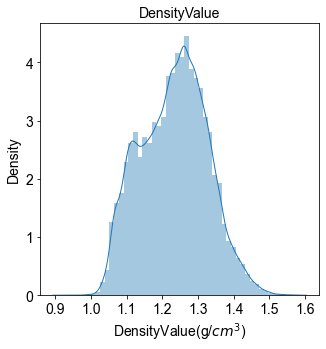

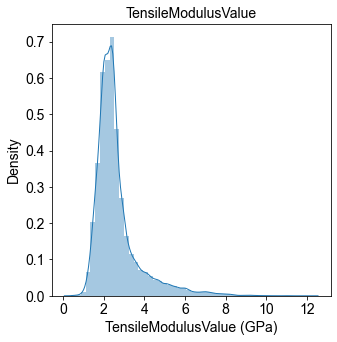

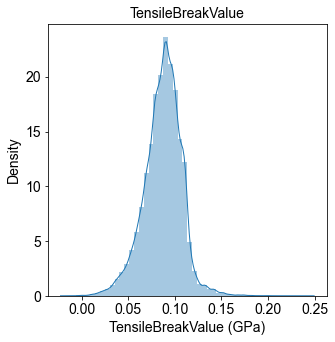

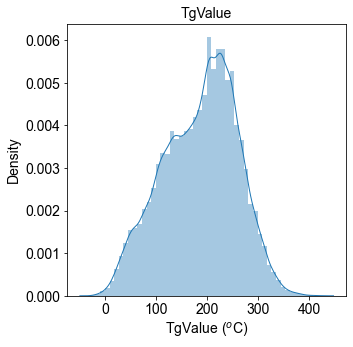

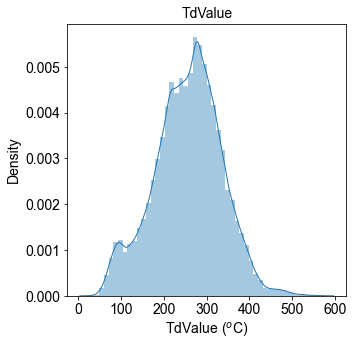

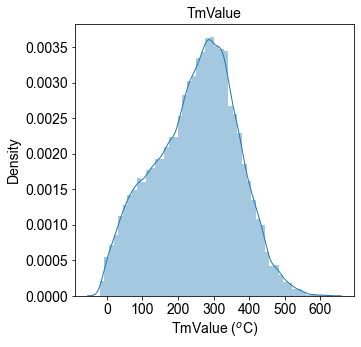

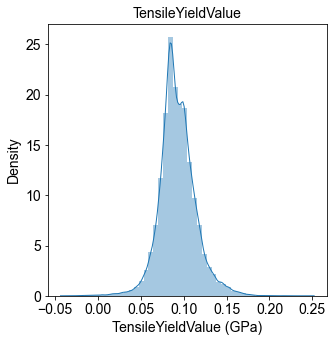

In [40]:
for col in ['DensityValue',
       'TensileModulusValue', 'TensileBreakValue', 'TgValue', 'TdValue',
       'TmValue', 'TensileYieldValue']:
    
    if col == 'DensityValue':
        xlable = col + '(g/$cm^3$)'
    if col in ['TgValue', 'TdValue','TmValue']:
        xlable = col + ' ($^o$C)'
    if col in ['TensileModulusValue', 'TensileBreakValue', 'TensileYieldValue']:
        xlable = col + ' (GPa)'
        
    plt.figure(figsize=(5,5))
    
    sns.distplot(DF2[col], hist = True, kde = True,
                 kde_kws = {'linewidth': 1})

    plt.title(col,fontname="Arial", fontsize=14)
    plt.xticks(fontname="Arial", fontsize=14, fontweight='normal')
    plt.yticks(fontname="Arial", fontsize=14, fontweight='normal')

    plt.xlabel(xlable,fontname="Arial", fontsize=14)
    plt.ylabel("Density",fontname="Arial", fontsize=14)

    plt.savefig("{}_His.png".format(col), dpi=1200, bbox_inches='tight') 

C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

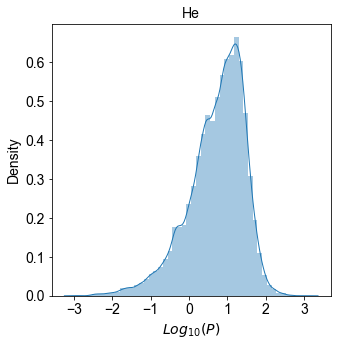

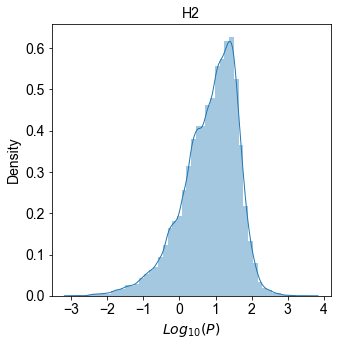

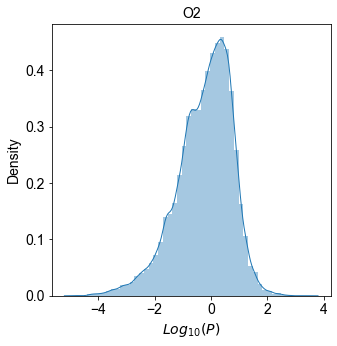

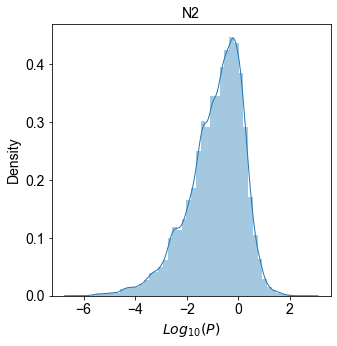

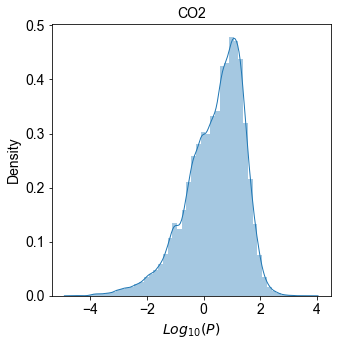

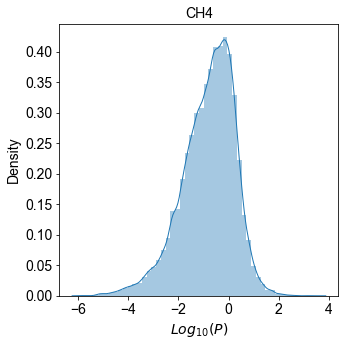

In [38]:
for col in ['He', 'H2', 'O2', 'N2', 'CO2', 'CH4']:
    plt.figure(figsize=(5,5))
    
    sns.distplot(DF2[col], hist = True, kde = True,
                 kde_kws = {'linewidth': 1})

    plt.title(col,fontname="Arial", fontsize=14)
    plt.xticks(fontname="Arial", fontsize=14, fontweight='normal')
    plt.yticks(fontname="Arial", fontsize=14, fontweight='normal')

    plt.xlabel("$Log_{10}(P)$",fontname="Arial", fontsize=14)
    plt.ylabel("Density",fontname="Arial", fontsize=14)

    plt.savefig("{}_His.png".format(col), dpi=1200, bbox_inches='tight') 

In [160]:
DF_pubchem_1million

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles
0,-0.152832,-0.118103,-1.449219,-2.017578,-0.792480,-2.197266,1.225586,1.104492,1.621094,0.061218,64.0000,168.25000,83.62500,0.030792,2179,135,*[C@H](CCCc1ccccc1)C(=O)N[C@@H](C)C(=O)CCc1ccc...
1,-0.635254,-0.577637,-2.042969,-2.951172,-1.592773,-2.769531,1.357422,1.283203,3.763672,0.105347,256.0000,144.50000,334.50000,0.087036,3271,320,*[C@@H](CCC(=O)O)C(=O)NCC[C@@H](C(=O)O)N(C(=O)...
2,1.934570,2.138672,1.411133,0.878418,2.105469,0.934570,1.226562,1.128906,2.166016,0.036011,97.3750,207.12500,146.25000,0.052307,2509,142,*[C@H](CCCN/C(=C/CC)N1C(=O)C2C3C(=O)N(*)C(=O)C...
3,-0.220459,-0.110168,-1.442383,-2.187500,-0.888184,-2.080078,1.299805,1.156250,1.980469,0.090027,79.6250,127.37500,153.12500,0.104187,2577,101,*CC#Cc1cc(CN2CCCC2C(=O)N(C(=O)CSCCC2NC(C(=O)N(...
4,1.654297,1.763672,1.090820,0.441650,1.684570,0.520996,1.243164,1.129883,2.484375,0.102356,188.3750,354.25000,255.50000,0.090515,827,434,*C(c1ccc(OCC)c(C)c1)C(C)N1C(=O)[C@H]2C[C@@H]([...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040560,-1.257812,-1.204102,-2.804688,-3.726562,-2.304688,-3.568359,1.422852,1.319336,6.507812,0.070496,102.4375,163.62500,136.00000,0.075195,295,161523,*CC(Cc1ccc(S(C)(=O)=O)cc1)CN(C(=O)CC(=C)C(=O)N...
1040561,-0.107849,0.001907,-1.265625,-2.128906,-0.783691,-1.939453,1.344727,1.237305,1.652344,0.088074,218.6250,55.96875,309.25000,0.070557,1316,161521,*C(CCCCN1C(=O)[C@H]2C3C=C(OC)C([C@@H]4C(=O)N(*...
1040562,-0.977539,-0.745117,-2.150391,-3.271484,-1.658203,-3.066406,1.613281,1.208008,4.914062,0.077637,203.1250,126.75000,60.59375,0.116760,2987,161521,*C(CCCCN(C(=O)CC(=C)C(=O)N(*)C(=O)/C(C)=C(/C)C...
1040563,0.280762,0.291748,-0.985840,-1.604492,-0.338867,-1.528320,1.265625,1.458984,5.519531,0.053894,105.8750,176.12500,332.25000,0.124817,91,161512,*CCN1CCN(CCNCCN2CCN(CCN3C(=O)C(O)C(=O)C(=O)N(*...


In [161]:
DF_GDB_1million

,He,H2,O2,N2,CO2,CH4,selectivity,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Comp_A,Comp_B,Smiles
0,2.623047,2.916016,2.578125,2.089844,3.099609,2.345703,1.009766,1.079102,2.402344,0.115479,229.75000,426.500,359.50000,0.143677,820,5849616,*C1C2C=CCC(C)NC2CC1N1C(=O)C2CCC(C(C)(C=C)[Si](...
1,2.195312,2.511719,1.942383,1.320312,2.572266,1.665039,1.251953,1.088867,2.531250,0.106689,207.62500,374.500,265.25000,0.098022,6285,5849768,*N1C(=O)CC(CC(=CC2CC2(C)CC2CC2(C)C)CC2CC(=O)N(...
2,0.782227,0.852539,-0.147461,-0.708984,0.593750,-0.694336,1.302734,1.123047,1.645508,0.075562,38.68750,163.500,45.34375,0.092346,8297,5849867,*N(C(=O)CCCCC(=O)N(C(=O)CC(C)(CC)CC(=O)O)C1CC2...
3,-0.224731,-0.213135,-1.569336,-2.162109,-0.959473,-2.250000,1.204102,1.250000,1.584961,0.059845,52.78125,165.250,51.78125,0.071228,722,5849538,*N(C(=O)CCC(=O)N(C(=O)COCCOCCN1C(=O)C=CC1=O)C1...
4,1.212891,1.375977,0.402100,-0.169067,1.176758,-0.128784,1.345703,1.179688,1.815430,0.090820,242.12500,362.000,235.50000,0.110962,4971,5849819,*N1C(=O)c2ccc(Oc3c(C)cc(Cc4cc(C)c(Oc5ccc6c(c5)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110916,1.271484,1.377930,0.503906,-0.144531,1.178711,-0.061615,1.323242,1.212891,2.091797,0.094360,201.75000,265.000,309.00000,0.085327,7425,4457578,*C=NC(C)C(CC(C(=O)O)C(C)OCC)N1C(=O)C2CC(C3CC(=...
1110917,0.787109,0.929199,-0.152954,-0.701660,0.550781,-0.730469,1.251953,1.335938,1.916992,0.088318,133.00000,212.750,193.12500,0.105530,5703,4457741,*CC(C)(C(C)C(OCC)c1coc(=O)o1)N1C(=O)c2ccc(Oc3c...
1110918,1.783203,2.054688,1.159180,0.760254,1.895508,0.652832,1.134766,1.148438,2.330078,0.065796,155.62500,326.250,209.50000,0.087097,2531,4457756,*N1C(=O)c2ccc3c4c(C=CCCCC)cc5c6c(ccc(c7c(C=CCC...
1110919,0.879883,1.014648,-0.064148,-0.645508,0.585938,-0.677734,1.231445,1.224609,2.396484,0.077393,159.25000,306.750,277.00000,0.080139,4609,4457565,*C(CC#C)C(CC#N)(CN1C(=O)OC2CC(C3CC(=O)N(*)C3=O...


C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

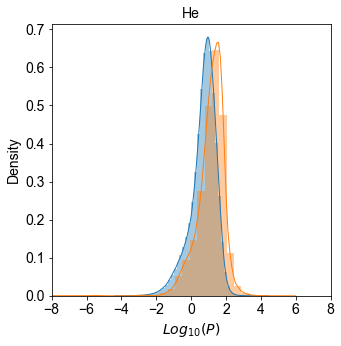

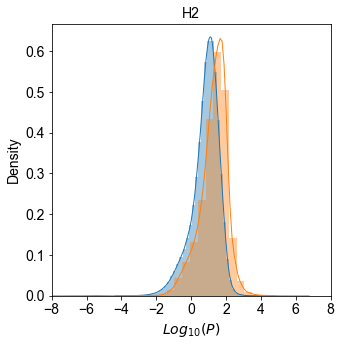

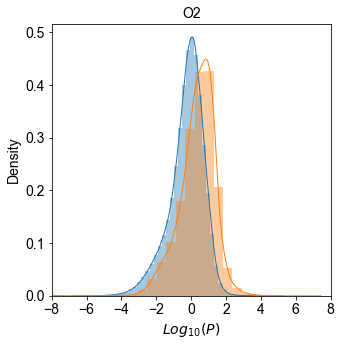

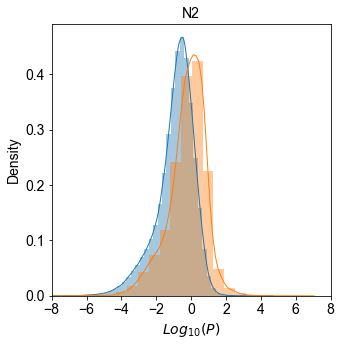

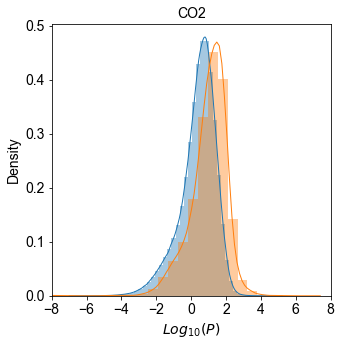

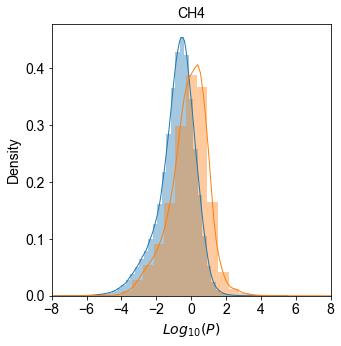

In [163]:
for col in ['He', 'H2', 'O2', 'N2', 'CO2', 'CH4']:
    plt.figure(figsize=(5,5))
    
    sns.distplot(DF_pubchem_1million[col], hist = True, kde = True,
                 kde_kws = {'linewidth': 1})
    sns.distplot(DF_GDB_1million[col], hist = True, kde = True,
                 kde_kws = {'linewidth': 1})
    
    plt.title(col,fontname="Arial", fontsize=14)
    plt.xticks(fontname="Arial", fontsize=14, fontweight='normal')
    plt.yticks(fontname="Arial", fontsize=14, fontweight='normal')
    plt.xlim(-8,8)
    plt.xlabel("$Log_{10}(P)$",fontname="Arial", fontsize=14)
    plt.ylabel("Density",fontname="Arial", fontsize=14)

    plt.savefig("{}_His_Compare.png".format(col), dpi=1200, bbox_inches='tight') 

C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\let20002\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

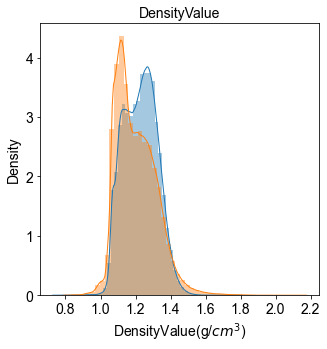

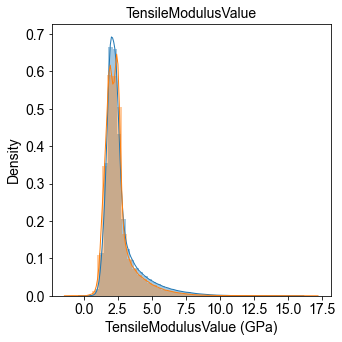

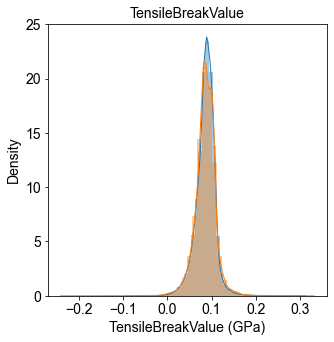

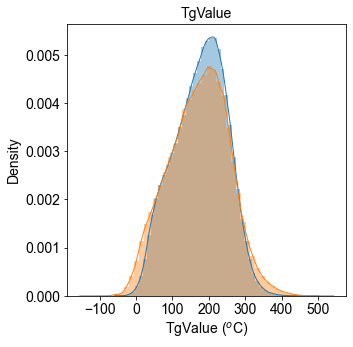

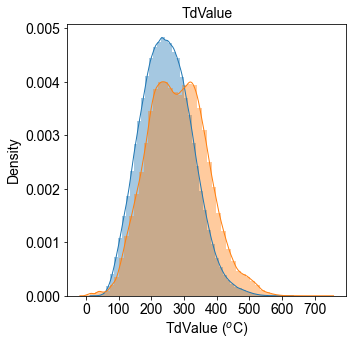

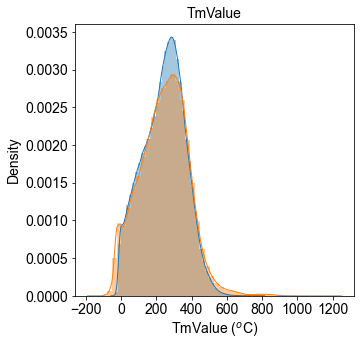

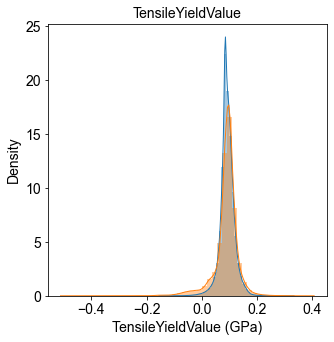

In [162]:
for col in ['DensityValue',
       'TensileModulusValue', 'TensileBreakValue', 'TgValue', 'TdValue',
       'TmValue', 'TensileYieldValue']:
    
    if col == 'DensityValue':
        xlable = col + '(g/$cm^3$)'
    if col in ['TgValue', 'TdValue','TmValue']:
        xlable = col + ' ($^o$C)'
    if col in ['TensileModulusValue', 'TensileBreakValue', 'TensileYieldValue']:
        xlable = col + ' (GPa)'
        
    plt.figure(figsize=(5,5))
    
    sns.distplot(DF_pubchem_1million[col], hist = True, kde = True,
                 kde_kws = {'linewidth': 1})
    sns.distplot(DF_GDB_1million[col], hist = True, kde = True,
                 kde_kws = {'linewidth': 1})
    
    plt.title(col,fontname="Arial", fontsize=14)
    plt.xticks(fontname="Arial", fontsize=14, fontweight='normal')
    plt.yticks(fontname="Arial", fontsize=14, fontweight='normal')

    plt.xlabel(xlable,fontname="Arial", fontsize=14)
    plt.ylabel("Density",fontname="Arial", fontsize=14)

    plt.savefig("{}_His_Compare.png".format(col), dpi=1200, bbox_inches='tight') 